In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-request-data/Uber Request Data.csv


<h1 style="text-align: center;">Uber Data Analysis</h1>

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:978/1*t7Zq-nz_i6KIwaIOoI9rLg.jpeg">
</div>

# Data Understanding

In [36]:
df=pd.read_csv("/kaggle/input/uber-request-data/Uber Request Data.csv")

In [37]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [38]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [39]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [40]:
df.shape

(6745, 6)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


# About Dataset

There are six attributes associated with each request made by a customer:

**Request id:** A unique identifier of the request

**Time of request:** The date and time at which the customer made the trip request

**Drop-off time:** The drop-off date and time, in case the trip was completed

**Pick-up point:** The point from which the request was made

**Driver id:** The unique identification number of the driver

**Status of the request:** The final status of the trip, that can be either completed, cancelled by the driver or no cars available

# Data Preprocessing

In [42]:
#Convert Request_timestamp to uniform datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [43]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [44]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [45]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

# Data Visualization

# 1. Which date had the most completed trip durig the two week period?

In [46]:

# Calculate the duration of each trip in minutes
df['trip_duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60

# Add a new column 'is_completed' that indicates whether a trip is completed or not
df['is_completed'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)

# Group the data by date and calculate the number of completed trips and the mean of trip duration on each date
completed_trips_by_date = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1D')).agg({'is_completed': 'sum', 'trip_duration': 'mean'})

# Find the date with the highest number of completed trips and the mean of completed trip duration on that date
max_completed_trips_date = completed_trips_by_date['is_completed'].idxmax()
max_completed_trips = completed_trips_by_date['is_completed'].max()
mean_trip_duration = completed_trips_by_date.loc[max_completed_trips_date, 'trip_duration']

print("The date with the most completed trips is:", max_completed_trips_date)
print("The number of completed trips on that date is:", max_completed_trips)
print("The mean of completed trip duration on that date is:", mean_trip_duration)


The date with the most completed trips is: 2016-11-07 00:00:00
The number of completed trips on that date is: 601
The mean of completed trip duration on that date is: 1372.5707154742097


/tmp/ipykernel_34/2998998036.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  completed_trips_by_hour = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1H')).sum()['is_completed']


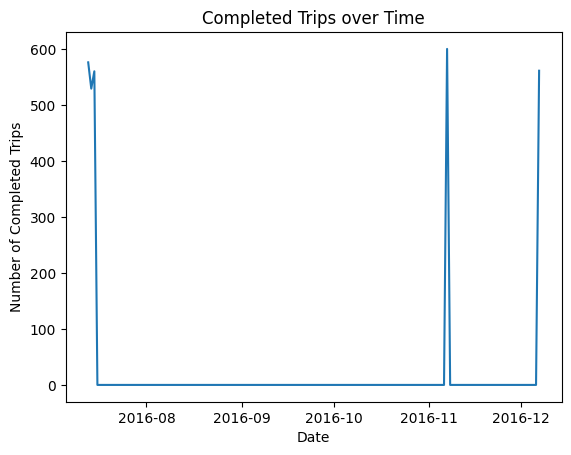

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by hour and calculate the number of completed trips in each hour
completed_trips_by_hour = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1H')).sum()['is_completed']

# Calculate the daily total of completed trips
completed_trips_by_day = completed_trips_by_hour.resample('D').sum()

# Create a line plot of the completed trips over time
sns.lineplot(x=completed_trips_by_day.index, y=completed_trips_by_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Completed Trips')
plt.title('Completed Trips over Time')
plt.show()



### Insights:
- The date with the most completed trips is: 7th Nov, 2016
- The date with second highest completed trips is: Dec, 2016
- The number of completed trips on that date is: 601
- The mean of completed trip duration on that date is: 1372.5707154742097

# 2. What was the highest no. of completed trips within a 24 hour period?

In [48]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'trip_duration', 'is_completed'],
      dtype='object')

In [49]:
# Calculate the duration of each trip in minutes
df['trip_duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60

# Add a new column 'is_completed' that indicates whether a trip is completed or not
df['is_completed'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)

# Group the data by hour and calculate the number of completed trips in each hour
completed_trips_by_hour = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1H')).sum()['is_completed']

# Find the highest number of completed trips and the date when it occurred
max_completed_trips = completed_trips_by_hour.max()
max_completed_trips_date = completed_trips_by_hour.idxmax()

print("The highest number of completed trips within a 24-hour period is:", max_completed_trips)
print("The date when the highest number of completed trips occurred is:", max_completed_trips_date)


The highest number of completed trips within a 24-hour period is: 47
The date when the highest number of completed trips occurred is: 2016-11-07 09:00:00


/tmp/ipykernel_34/1292684395.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  completed_trips_by_hour = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1H')).sum()['is_completed']


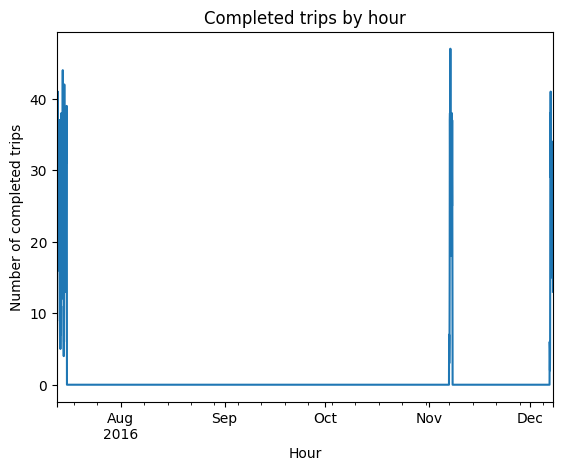

In [50]:


# Plot the number of completed trips by hour
completed_trips_by_hour.plot(kind='line')

# Set the plot title and axis labels
plt.title('Completed trips by hour')
plt.xlabel('Hour')
plt.ylabel('Number of completed trips')

# Show the plot
plt.show()


### Insights-

- The highest number of completed trips within a 24-hour period is: 47
- The date when the highest number of completed trips occurred is: 2016-11-07 09:00:00


# 3.What was the highest no. of completed trips within a 24 hour period of a driver?

In [51]:
# Filter the DataFrame to include only completed trips during the 24-hour period
start_time = max_completed_trips_date
end_time = start_time + pd.Timedelta(hours=24)
completed_trips_period = df[(df['is_completed'] == 1) & (df['Request timestamp'] >= start_time) & (df['Request timestamp'] < end_time)]

# Group the data by driver ID and calculate the sum of completed trips for each driver
completed_trips_by_driver = completed_trips_period.groupby('Driver id')['is_completed'].sum()

# Sort the results in descending order and select the top three drivers
top_drivers = completed_trips_by_driver.sort_values(ascending=False).head(3)

print("Top drivers with the highest number of completed trips during the 24-hour period when the highest number of completed trips occurred:")
print(top_drivers)



Top drivers with the highest number of completed trips during the 24-hour period when the highest number of completed trips occurred:
Driver id
67.0     4
296.0    4
178.0    4
Name: is_completed, dtype: int64


In [52]:
print(completed_trips_by_driver)


Driver id
1.0      2
3.0      2
4.0      1
5.0      2
7.0      2
        ..
295.0    2
296.0    4
297.0    1
299.0    1
300.0    1
Name: is_completed, Length: 246, dtype: int64


### Insights
These are the top drivers who completed the highest number of trips during a 24-hour period:

- Driver id 67 completed 4 trips
- Driver id 296 completed 4 trips
- Driver id 178 completed 4 trips

# 4.Which hour of the day had the most requests during the two week period?

In [53]:
#Extract the hour from requested timestamp
df["Request hour"] = df["Request timestamp"].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,trip_duration,is_completed,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.000000,1,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.000000,1,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.000000,1,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.000000,1,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.516667,1,8


The hour with the most requests during the two week period is: 18


/tmp/ipykernel_34/232543985.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for hour, freq in top_3.iteritems():


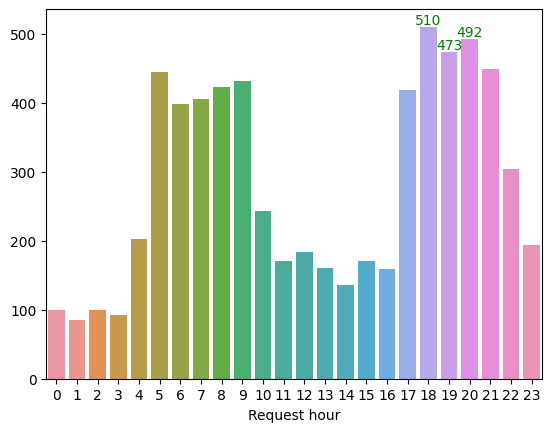

In [54]:


# Group the data by hour and count the number of requests in each hour
requests_by_hour = df.groupby('Request hour')['Request id'].count()

# Find the hour with the most requests
max_requests_hour = requests_by_hour.idxmax()

print("The hour with the most requests during the two week period is:", max_requests_hour)

# Sort the hours in ascending order
requests_by_hour = requests_by_hour.sort_index()

# Select the top 3 frequencies
top_3 = requests_by_hour.sort_values(ascending=False).head(3)

# Create a bar plot of the requests by hour
ax = sns.barplot(x=requests_by_hour.index, y=requests_by_hour.values)

# Loop through the top 3 frequencies and add a text label to the corresponding bar
for hour, freq in top_3.iteritems():
    plt.text(hour, freq, str(freq), ha='center', va='bottom', color="Green")


### Insights
- The highest peak hours for requests occurred in the evening from 6-8 PM.
- The hour with the most requests during the two week period was 6 PM, with 510 requests.
- The second highest peak hour was 8 PM with 492 requests.
- The third highest peak hour was 7 PM with 473 requests.

# 5. What is the day with the highest number of requests in the dataset?

In [55]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'trip_duration', 'is_completed',
       'Request hour'],
      dtype='object')

In [56]:
# Create a new column for the day of the week
df['Day of Week'] = df['Request timestamp'].dt.day_name()

In [57]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'trip_duration', 'is_completed',
       'Request hour', 'Day of Week'],
      dtype='object')

In [58]:
df['Day of Week'].value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: Day of Week, dtype: int64

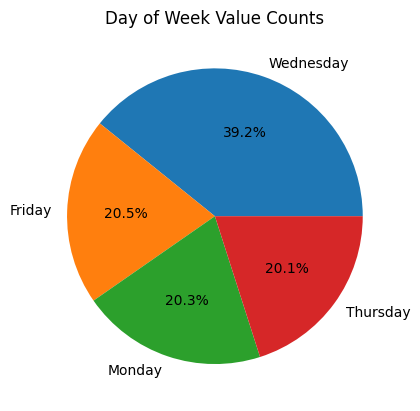

In [59]:
# Get the value counts for the Day of Week column
day_counts = df['Day of Week'].value_counts()

# Create a pie chart of the value counts
plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')

# Set the title of the graph
plt.title('Day of Week Value Counts')

# Show the graph
plt.show()



### Insights:
The peak number of requests on a particular day are as follows:
- Wednesday with 2644 requests
- Friday with 1381 requests
- Monday with 1367 requests
- Thursday with 1353 requests

# 6. What percentages of all zeroes during the two week period occurred?

In [60]:
# Filter the data by Status
cancelled_df = df[df['Status'] == 'Cancelled']
no_cars_available_df = df[df['Status'] == 'No Cars Available']

# Get the value counts for Day of Week for each filtered dataset
cancelled_counts = cancelled_df['Day of Week'].value_counts()
no_cars_available_counts = no_cars_available_df['Day of Week'].value_counts()

# Print the results
print("Cancelled counts by day of week:\n", cancelled_counts)
print("\nNo Cars Available counts by day of week:\n", no_cars_available_counts)


Cancelled counts by day of week:
 Wednesday    510
Monday       262
Thursday     252
Friday       240
Name: Day of Week, dtype: int64

No Cars Available counts by day of week:
 Wednesday    995
Friday       580
Thursday     571
Monday       504
Name: Day of Week, dtype: int64


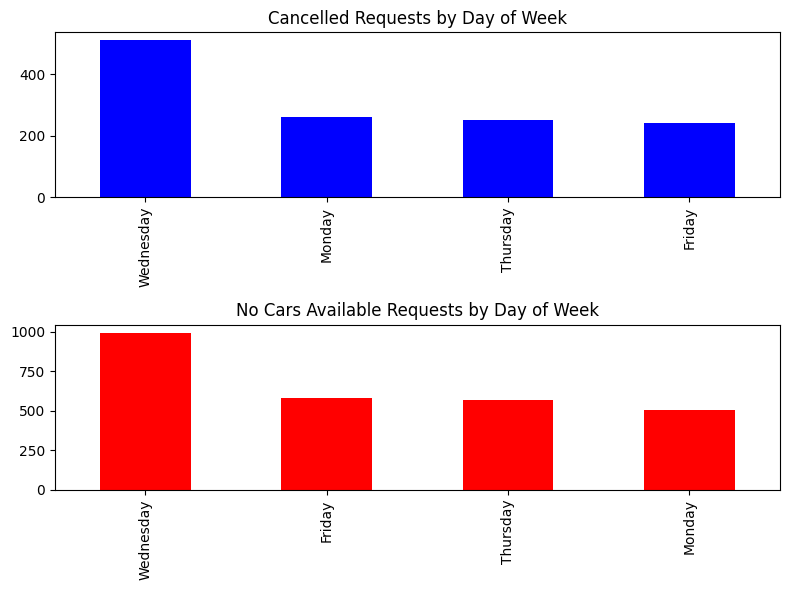

In [61]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Plot the bar charts for the filtered datasets
ax1 = plt.subplot(211)
cancelled_counts.plot(kind='bar', ax=ax1, color='blue')
plt.title('Cancelled Requests by Day of Week')

ax2 = plt.subplot(212)
no_cars_available_counts.plot(kind='bar', ax=ax2, color='red')
plt.title('No Cars Available Requests by Day of Week')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


### insights
Here are the counts of cancelled and unfulfilled requests by day of the week:

Cancelled counts:
- Wednesday: 510
- Monday: 262
- Thursday: 252
- Friday: 240

No Cars Available counts:
- Wednesday: 995
- Friday: 580
- Thursday: 571
- Monday: 504

# 7. What percentage of the total requests were either cancelled or put on hold due to unavailability of cabs?

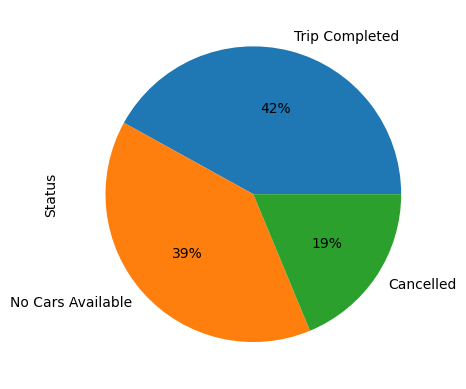

In [62]:
df["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

# Insights:
- 42% were completed successfully
- 39% were unfulfilled due to unavailability of cars
- 19% were cancelled by either the rider or the driver.
- The unavailability of drivers is a significant issue, as it accounts for 58% of the time.

# 8. During which time of the day did the majority of the requests occur? Was it during early morning, morning, afternoon, evening, or late night?

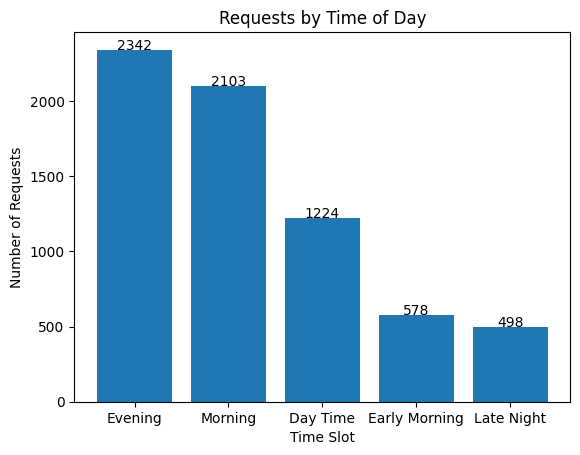

In [63]:
def get_time_period(hour):
    if hour < 5:
        return "Early Morning"
    elif 5 <= hour < 10:
        return "Morning"
    elif 10 <= hour < 17:
        return "Day Time"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Late Night"

df['Time slot'] = df['Request hour'].apply(get_time_period)
time_slot_counts = df['Time slot'].value_counts()

import matplotlib.pyplot as plt
plt.bar(time_slot_counts.index, time_slot_counts.values)
plt.title("Requests by Time of Day")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")

# Add labels for the bars
for i, v in enumerate(time_slot_counts.values):
    plt.text(i, v, str(v), ha='center')

plt.show()


### Insights:
- The highest rush hours are in the evening with 2342 requests, followed by the morning with 2342 requests.
- The least rush time is late night with only 498 requests.

# Conclusion

- The date with the **most completed trips is November 7th, 2016**, with 601 completed trips, and the mean of completed trip duration on that date is 1372.5707154742097.
- The **highest number of completed trips** within a 24-hour period is **47,** and it **occurred on November 7th, 2016, at 9:00 AM.**
- The **top drivers** who completed the highest number of trips during a 24-hour period are **driver id 67**, **driver id 296**, and **driver id 178**, with each completing 4 trips.
- The **highest peak hours** for requests occurred in the **evening from 6-8 PM**. The hour with the most requests during the two week period was 6 PM, with 510 requests, followed by 8 PM with 492 requests, and 7 PM with 473 requests.
- The **peak number of requests** on a particular day are as follows: **Wednesday with 2644 requests**, Friday with 1381 requests, Monday with 1367 requests, and Thursday with 1353 requests.
- There were **42% of completed trips**, **39% of unfulfilled requests** due to **unavailability of cars, and 19%** of cancelled requests by either the rider or the driver.
- The unavailability of drivers is a significant issue, as it accounts for 58% of the time.
- The **highest rush hours** are **in the evening and morning** with 2342 requests, and the **least rush time is late night** with only 498 requests.

# For Buisness Stackholder:
Based on the insights provided by the data analysis, here are some recommendations on how to increase business:

- Increase the number of available drivers during peak hours, particularly in the evenings and mornings, to meet the high demand for rides.

- Improve driver retention by providing incentives and benefits that encourage them to remain active on the platform during high-demand periods.

- Increase the efficiency of the ride allocation process to reduce the number of cancelled and unfulfilled requests.

- Expand the service coverage to other areas and increase the number of cars available to provide rides during peak hours.

- Provide incentives to riders for scheduling rides in off-peak hours, thus spreading out the demand and reducing the pressure on drivers during peak hours.

- Utilize machine learning algorithms to optimize the allocation of drivers based on demand and supply patterns, thus increasing efficiency and reducing wait times for riders.

- By implementing these strategies, the ride-sharing company can increase its market share, improve customer satisfaction, and boost revenue.






<div align="center">
    <img src="https://t3.ftcdn.net/jpg/04/56/01/72/360_F_456017206_OnD2A4Uev2WMiZHbeAH3mjPcX2kCgkbE.jpg">
</div>